In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images & it will automatically lable all the images

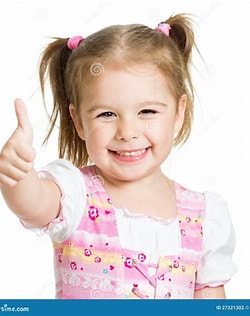

In [3]:
img = image.load_img(r'/content/drive/MyDrive/Image classification/training/happy/3.jpeg')
img

array([[[226, 216, 209],
        [236, 226, 219],
        [249, 236, 228],
        ...,
        [ 74, 148, 118],
        [ 87, 165, 134],
        [ 90, 170, 139]],

       [[246, 236, 229],
        [248, 238, 231],
        [252, 241, 233],
        ...,
        [ 76, 161, 129],
        [ 77, 168, 135],
        [ 76, 170, 136]],

       [[254, 246, 239],
        [248, 240, 233],
        [246, 239, 230],
        ...,
        [ 51, 155, 122],
        [ 43, 156, 122],
        [ 39, 159, 124]],

       ...,

       [[  7, 180, 122],
        [  6, 178, 120],
        [  9, 176, 125],
        ...,
        [ 66, 172, 131],
        [ 73, 178, 135],
        [ 69, 174, 131]],

       [[  2, 178, 118],
        [  1, 175, 115],
        [  3, 173, 120],
        ...,
        [ 58, 166, 124],
        [ 67, 171, 130],
        [ 71, 173, 132]],

       [[  3, 180, 117],
        [  0, 174, 114],
        [  0, 169, 113],
        ...,
        [ 51, 161, 119],
        [ 61, 165, 124],
        [ 68, 170, 129]]], dtype=uint8)
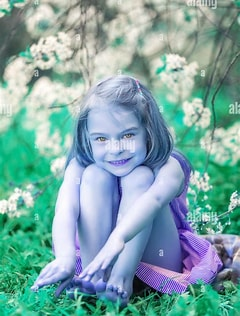

In [5]:
i1 = cv2.imread(r'/content/drive/MyDrive/Image classification/training/happy/4.jpeg')
i1
# 3 dimension metrics are created for the image
# the value ranges from 0-255

In [6]:
i1.shape
# shape of your image height, weight, rgb

(316, 240, 3)

In [7]:
train = ImageDataGenerator(rescale = 1/255)
validataion = ImageDataGenerator(rescale = 1/255)
# to scale all the images i need to divide with 255
# we need to resize the image using 200, 200 pixel

In [8]:
train_dataset = train.flow_from_directory(
    r'/content/drive/MyDrive/Image classification/training',
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)

validation_dataset = validataion.flow_from_directory(
    r'/content/drive/MyDrive/Image classification/validation',
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)


Found 13 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
# now we are applying maxpooling

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)


In [13]:
model_fit = model.fit(
    train_dataset,
    steps_per_epoch=3,
    epochs=10,
    validation_data=validation_dataset
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.2768 - loss: 10.5906 - val_accuracy: 0.5385 - val_loss: 1.2910
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8889 - loss: 0.2063 - val_accuracy: 0.6154 - val_loss: 0.6725
Epoch 3/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3333 - loss: 1.0281

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.4226 - loss: 1.6920 - val_accuracy: 0.6923 - val_loss: 0.5756
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7778 - loss: 0.5352 - val_accuracy: 0.5385 - val_loss: 1.4555
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4861 - loss: 1.2690 - val_accuracy: 0.6923 - val_loss: 0.4838
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1667 - loss: 1.1533 - val_accuracy: 1.0000 - val_loss: 0.5533
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7232 - loss: 0.5473 - val_accuracy: 0.7692 - val_loss: 0.4397
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7778 - loss: 0.5015 - val_accuracy: 1.0000 - val_loss: 0.3596
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.3525 - val_accuracy: 0.9231 - val_loss: 0.2944
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4444 - loss: 1.1945 - val_accuracy: 0.9231 - val_loss: 0.3953


In [16]:
dir_path = r'/content/drive/MyDrive/Image classification/testing/happy'
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

9.jpeg
3.jpeg
4.jpeg
5.jpeg
7.jpeg
8.jpeg
6.jpeg


In [18]:
dir_path = r'/content/drive/MyDrive/Image classification/testing/happy/3.jpeg'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

NotADirectoryError: [Errno 20] Not a directory: '/content/drive/MyDrive/Image classification/testing/happy/3.jpeg'

In [20]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = r'/content/drive/MyDrive/Image classification/testing/happy'
img = image.load_img(img_path, target_size=(200, 200))
plt.imshow(img)
plt.show()


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/Image classification/testing/happy'

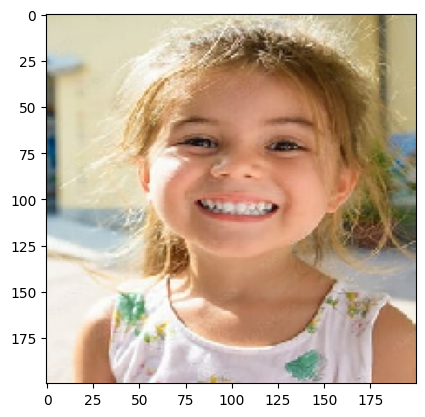

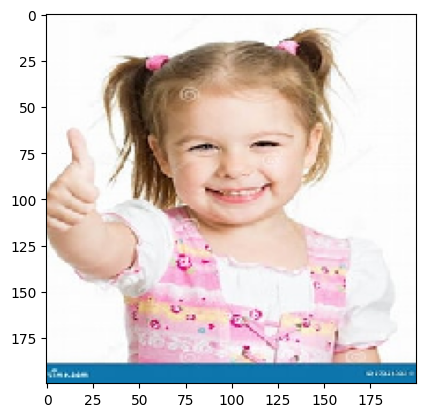

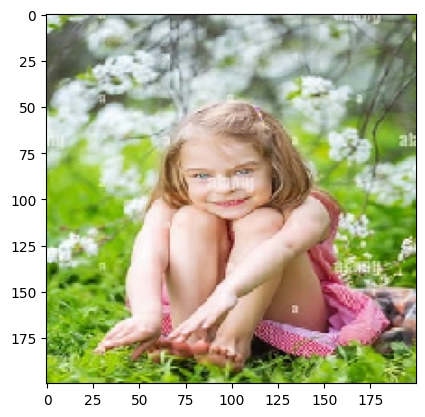

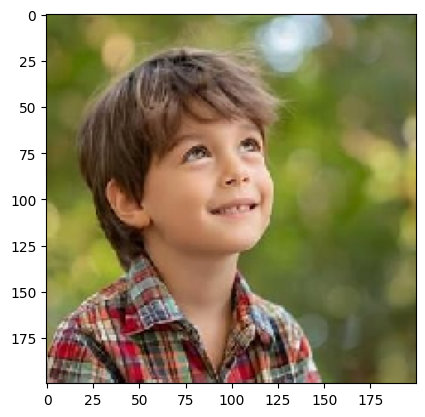

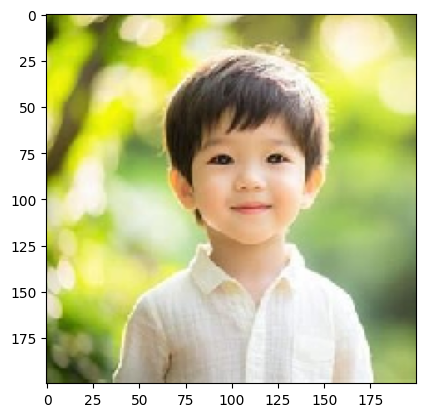

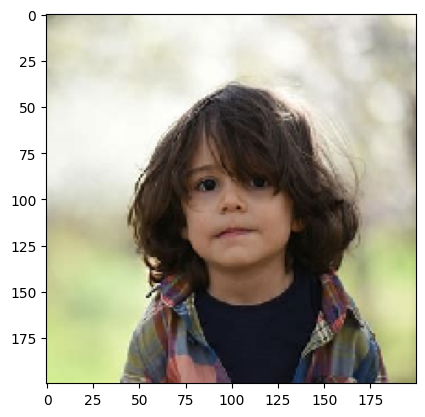

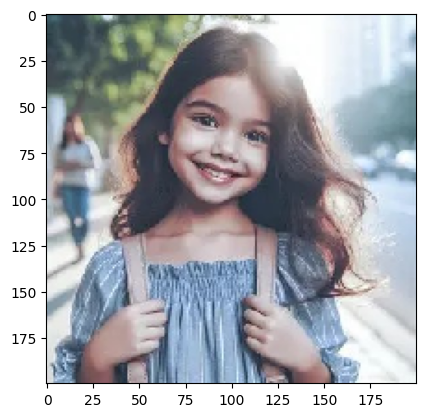

In [22]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

dir_path = r'/content/drive/MyDrive/Image classification/testing/happy'

for img_file in os.listdir(dir_path):
    img_path = os.path.join(dir_path, img_file)  # full path to image
    img = image.load_img(img_path, target_size=(200, 200))
    plt.imshow(img)
    plt.show()


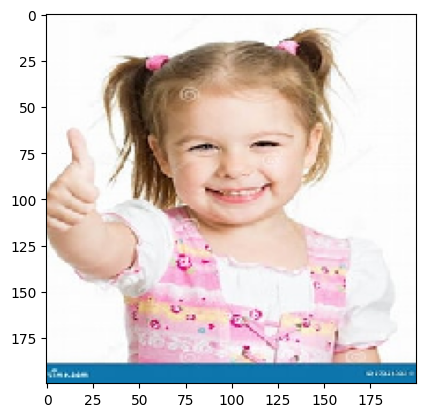

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
 i am not happy


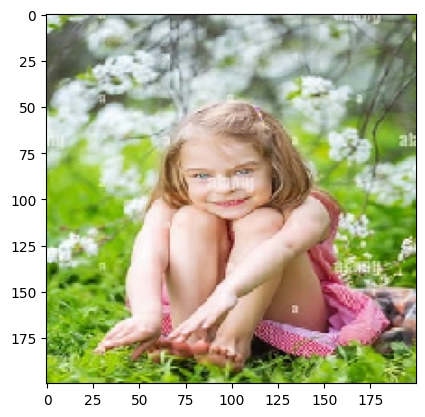

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
 i am not happy


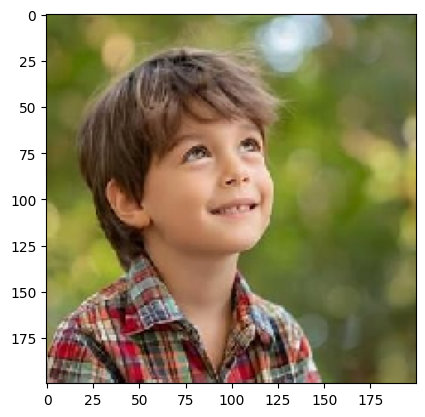

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
 i am not happy


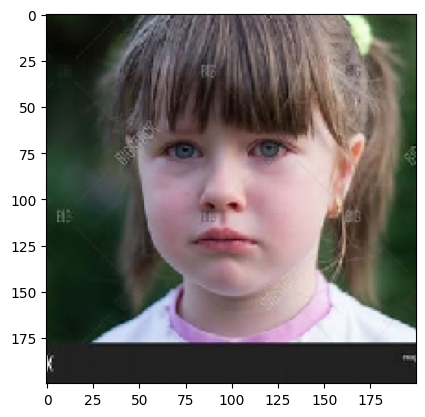

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
i am happy


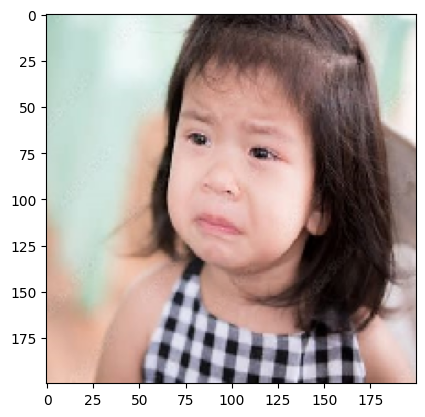

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
i am happy


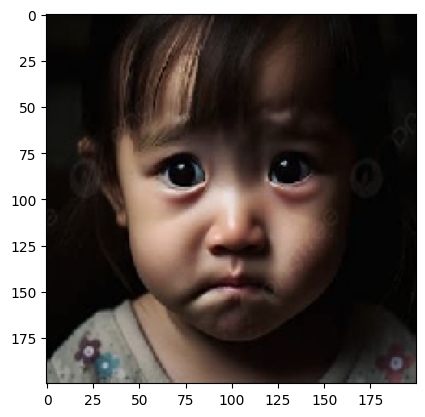

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
i am happy


In [23]:
dir_path = r'/content/drive/MyDrive/Image classification/testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    val = model.predict(images)
    if val == 0:
        print( ' i am not happy')
    else:
        print('i am happy')